In [1]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

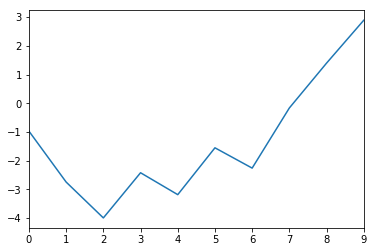

In [2]:
# Plotting with pandas
s = pd.Series(np.random.randn(10).cumsum())
index = np.arange(0, 100, 10) # x axis range (0-100) in 10 increment ticks
s.plot()

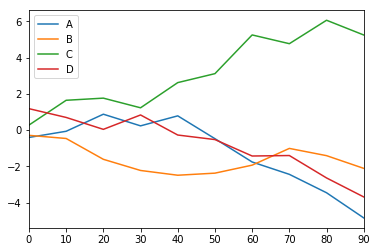

In [3]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0), # make data for 4 lines
                  columns = ['A', 'B', 'C', 'D'],   # label each line
                  index = np.arange(0, 100, 10))    # Set limits
# create subplot and automatically generate a legend located at 'best'
df.plot() # could also use 'df.plot.line()'

<center>Pandas '.plot()' arguments</center>

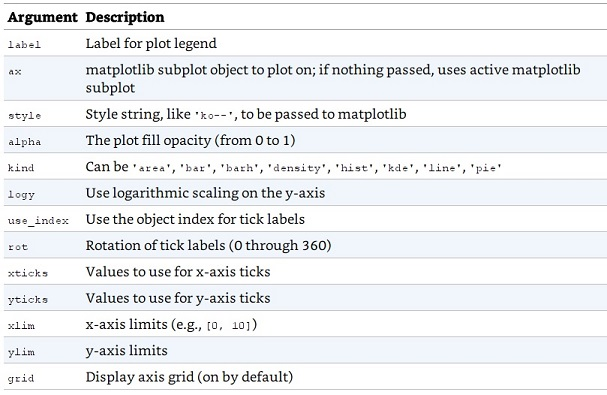

<center>DataFrame Plot arguments</center>

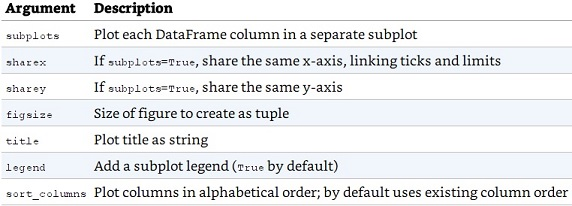

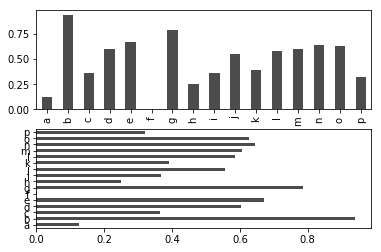

In [4]:
# creating Bar Plots
fig, axes = plt.subplots(2, 1)  # create 2 subplots in 1 column
data = pd.Series(np.random.rand(16), index = list('abcdefghijklmnop'))
# 'alpha = 0.7' means fill with partial transparency
data.plot.bar(ax = axes[0], color = 'k', alpha = 0.7)  # vertical bars
data.plot.barh(ax = axes[1], color = 'k', alpha = 0.7) # horizontal bars

Genus         A         B         C         D
one    0.475177  0.872469  0.825674  0.385086
two    0.398315  0.048586  0.234499  0.760522
three  0.306584  0.680607  0.954869  0.404165
four   0.398997  0.307699  0.264380  0.441353
five   0.742686  0.475217  0.254979  0.880253
six    0.188947  0.650006  0.624380  0.922282


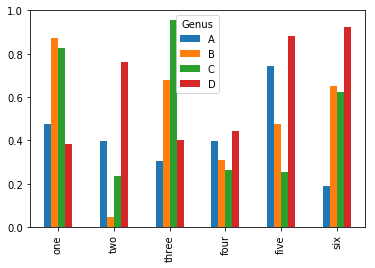

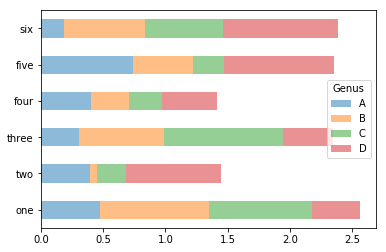

In [5]:
# create bar charts using a DataFrame
df = pd.DataFrame(np.random.rand(6, 4), # six rows, four columns
                  index = ["one", 'two', 'three', 'four', 'five', 'six'],
                  columns = pd.Index(['A', 'B', 'C', 'D'], name = 'Genus'))
print(df)
# plot column groups at each tick(row) with unique colors with name 'Genus'
df.plot.bar() # Note: Column name 'Genus' is used in Legend
# stack grouped column data onto one bar in horizontal bar chart
df.plot.barh(stacked = True, alpha = 0.5) # Notice partial transparency

   total_bill   tip smoker  day    time  size
0       16.99  1.01     No  Sun  Dinner     2
1       10.34  1.66     No  Sun  Dinner     3
2       21.01  3.50     No  Sun  Dinner     3
3       23.68  3.31     No  Sun  Dinner     2
4       24.59  3.61     No  Sun  Dinner     4 

size  1   2   3   4  5  6
day                      
Fri   1  16   1   1  0  0
Sat   2  53  18  13  1  0
Sun   0  39  15  18  3  1
Thur  1  48   4   5  1  3 

size   2   3   4  5
day                
Fri   16   1   1  0
Sat   53  18  13  1
Sun   39  15  18  3
Thur  48   4   5  1 

size         2         3         4         5
day                                         
Fri   0.888889  0.055556  0.055556  0.000000
Sat   0.623529  0.211765  0.152941  0.011765
Sun   0.520000  0.200000  0.240000  0.040000
Thur  0.827586  0.068966  0.086207  0.017241 



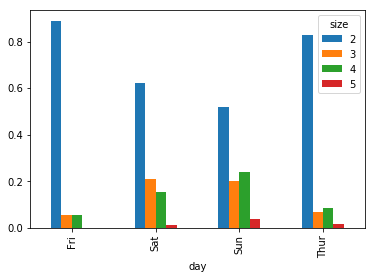

In [6]:
# Example: Visual tipping per party size per day
tips = pd.read_csv('examples/tips.csv')
print(tips.head(), '\n')

# Data processing
party_counts = pd.crosstab(tips['day'], tips['size']) #Get data of interest
print(party_counts, '\n')
party_counts = party_counts.loc[:, 2:5] # Remove columns with little data
print(party_counts, '\n')
# Normalize (scale) each value between 0 and 1)
party_pcts = party_counts.div(party_counts.sum(1), axis = 0) 
print(party_pcts, '\n')
party_pcts.plot.bar() # plot data

   total_bill   tip smoker  day    time  size
0       16.99  1.01     No  Sun  Dinner     2
1       10.34  1.66     No  Sun  Dinner     3
2       21.01  3.50     No  Sun  Dinner     3
3       23.68  3.31     No  Sun  Dinner     2
4       24.59  3.61     No  Sun  Dinner     4 

   total_bill   tip smoker  day    time  size   tip_pct
0       16.99  1.01     No  Sun  Dinner     2  0.063204
1       10.34  1.66     No  Sun  Dinner     3  0.191244
2       21.01  3.50     No  Sun  Dinner     3  0.199886
3       23.68  3.31     No  Sun  Dinner     2  0.162494
4       24.59  3.61     No  Sun  Dinner     4  0.172069


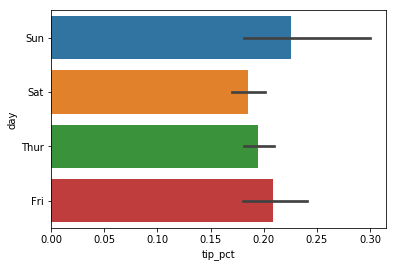

In [7]:
# use Seaborn when performing aggregation or summarization
# Visualize tipping percentage per day using 'tips' dataset
print(tips.head(), '\n')

# Add computed column 'tip_pct' to 'tips' dataset
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
print(tips.head())
# Plot bar chart from tips dataset using tip_pct on x axis and day on y axis
sns.barplot(x = 'tip_pct', y = 'day', data = tips, orient = 'h')
# Note: balck lines represent 95% confidence interval

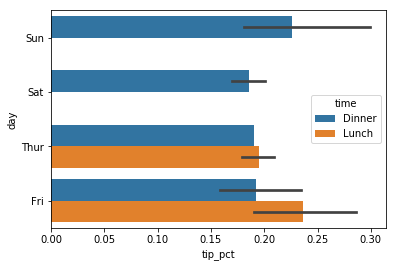

In [8]:
# Visualize categorical data by specifying time or day using 'hue' argument
sns.barplot(x = 'tip_pct', y='day', hue='time', data=tips, orient='h')
# Note, you can change seaborn's aesthetics values using '.set()' method
# sns.set(style = 'whitegrid')

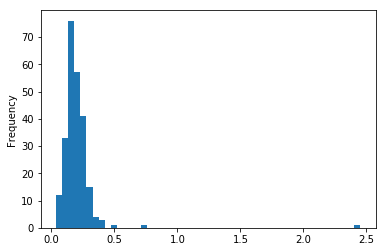

In [9]:
# create a histogram of tip percentages using 'plot.hist()' method
tips['tip_pct'].plot.hist(bins = 50)

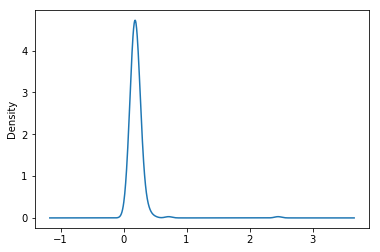

In [10]:
# create a density or 'kernal density estimate'(KDE) plot 'plot.density()'
tips['tip_pct'].plot.density() # could also use: tips['tip_pct'].plot.kde()

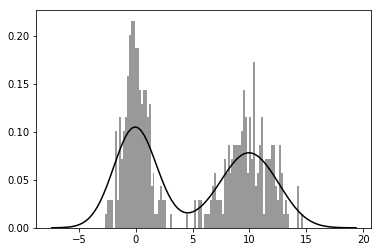

In [11]:
# Plot a histogram and continuous density estimate on same subplot
comp1 = np.random.normal(0, 1, size = 200)
comp2 = np.random.normal(10, 2, size = 200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values, bins = 100, color = 'k') # plot using'.distplot()'

         cpi      m1  tbilrate  unemp
198  216.889  1474.7      1.17    6.0
199  212.174  1576.5      0.12    6.9
200  212.671  1592.8      0.22    8.1
201  214.469  1653.6      0.18    9.2
202  216.385  1673.9      0.12    9.6 

          cpi        m1  tbilrate     unemp
198 -0.007904  0.045361 -0.396881  0.105361
199 -0.021979  0.066753 -2.277267  0.139762
200  0.002340  0.010286  0.606136  0.160343
201  0.008419  0.037461 -0.200671  0.127339
202  0.008894  0.012202 -0.405465  0.042560 



Text(0.5, 1.0, 'changes in log m1 versus log unemp')

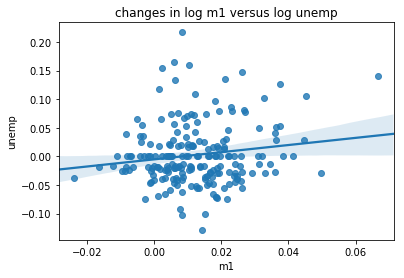

In [12]:
# Generate a Scatter Plot
macro = pd.read_csv('examples/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']] # extract specific columns
print(data[-5:], '\n')
trans_data = np.log(data).diff().dropna() # Compute log differences
print(trans_data[-5:], '\n')
# Build a scatter plot using '.regplot()' method
sns.regplot('m1', 'unemp', data = trans_data) 
plt.title('changes in log %s versus log %s' % ('m1', 'unemp'))

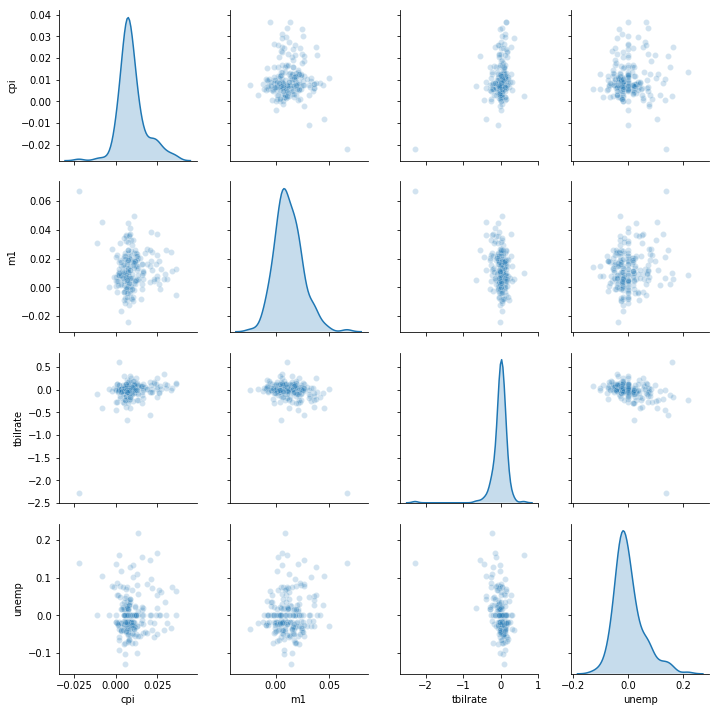

In [13]:
# Create a scatter plot matrix (pairs plot) using '.pairplot()'
sns.pairplot(trans_data, diag_kind = 'kde', plot_kws = {'alpha': 0.2})

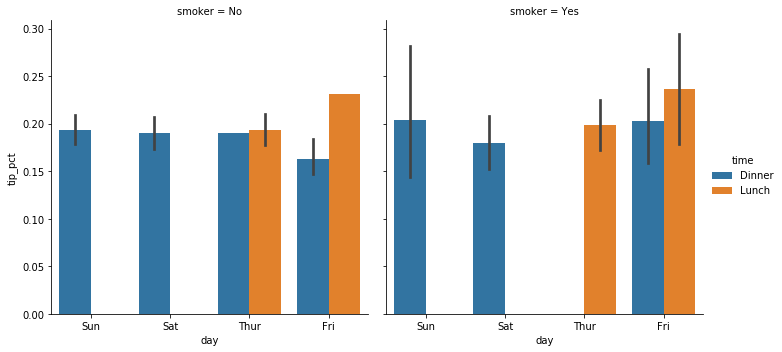

In [14]:
# Plot when data has multiple categorical variables or facets - facet grid
# Show chart using '.catplot()'
sns.catplot(x = 'day', y = 'tip_pct', hue = 'time', col = 'smoker', 
               kind = 'bar', data = tips[tips.tip_pct < 1])

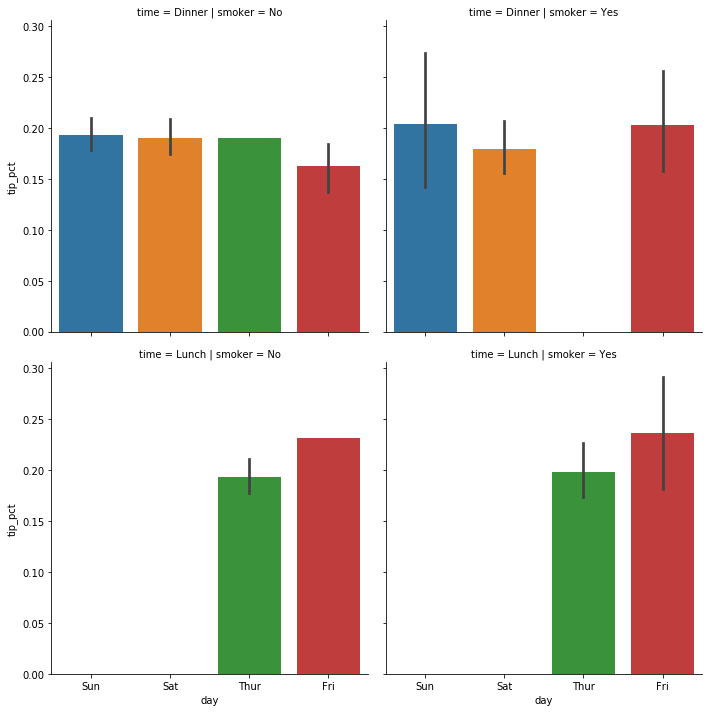

In [15]:
# Split catagorical data into seperate rows using 'row' argument
sns.catplot(x = 'day', y = 'tip_pct', row = 'time', col = 'smoker', 
               kind = 'bar', data = tips[tips.tip_pct < 1])

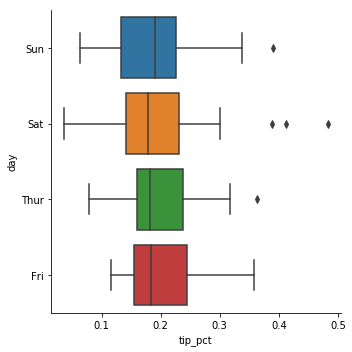

In [16]:
# Use box plots to show other data such as median, quartiles and outliers
sns.catplot(x = 'tip_pct', y = 'day', kind = 'box', 
            data = tips[tips.tip_pct < 0.5])

# seaborn documentation: https://seaborn.pydata.org/
# Bokeh: http://bokeh.pydata.org/
# Plotly: https://github.com/plotly/plotly.py